## Install necessary packages
- Using `Preffered Installer Program` or `pip` command to install necessary packages

In [1]:
!pip install scikit-learn keras==3.3 tensorflow==2.16.1 opencv-python numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
   

## Imports
- Importing all the necessary python modules for the image processing and model building

In [28]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow import keras
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


## Dataset
- Cloning the image dataset from a github repository

In [3]:
!git clone 'https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet.git'

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035
Receiving objects: 100% (3039/3039), 79.25 MiB | 16.51 MiB/s, done.


## Data-preprocessing

- Here, we iterate through every file in the dataset and generate a path of each and every image.

In [ ]:
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/content/Brain-Tumor-Classification-DataSet'):
   for filename in filenames:
       print(os.path.join(dirname, filename))

In [5]:
dataset = '/content/Brain-Tumor-Classification-DataSet'

- Here, we declare the class labels into  which our CNN is being programmed to classify into.
- We map each class into dictionary with indices as the keys and class labels as values.

In [6]:

class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
label_mapping = {}

for i in range(len(class_labels)):
  label_mapping[i] = class_labels[i]


## Creating X and Y
- We declare to empty arrays X and Y for storing the input and the required output for which we are training the CNN model for.
- We iterate through both the `Training` and  `Testing` folders in the dataset and append each file that is an image to the 'X' array which is our input.


- ### Preprocessing the Image
    - Here we first read the image as a grayscale image to take only 1 input channel making it easier for training.
    - We resize the image to 224x224 pixels.
    - Then, we finally append the image.
    - Simultaneously we append the `Index` number of class label we are cuurently exploring, so that we will get a number which corresponds to the Class of Tumour detected.

In [7]:

x = []
y = []

for i, class_label in enumerate(class_labels):
  train_path = os.path.join(dataset, 'Training', class_label)
  test_path = os.path.join(dataset, 'Testing', class_label)

  for filename in os.listdir(train_path):
    if filename.endswith('.jpg'):
      img_path = os.path.join(train_path, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (224,224))
      x.append(img)
      y.append(i)
  for filename in os.listdir(test_path):
    if filename.endswith('.jpg'):
      img_path = os.path.join(test_path, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img,(224,224))
      x.append(img)
      y.append(i)

- Convert the data into numpy arrays
  

In [8]:
x = np.array(x)
y = np.array(y)

- Split the data into test and training data, with 20% of data to be testing data.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Model Architecture
- In this we used 4 Convolutional layers followed by Maxpooling and Batch normalistaion to reduce the number of parameters while preserving the important features.
- Then we use a flatten layer before the fully connected layer(Dense layer) to make all the preceding layers into a 1 Dimensional vector.

In [39]:
from keras import layers, models, regularizers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,1),
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## The Model and Details
- Here we display the model summary and the different layers we used.
- Also, we compile the model using `Adam` optimizer and `sparse_categorical_crossentropy` since we need numerical output for the classification.

In [40]:

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,266,692 (73.50 MB)

 Trainable params: 19,265,732 (73.49 MB)

 Non-trainable params: 960 (3.75 KB)

- Fitting the model

In [46]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9717 - loss: 0.0827 - val_accuracy: 0.8499 - val_loss: 1.1818
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9667 - loss: 0.1304 - val_accuracy: 0.8668 - val_loss: 1.0691
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9654 - loss: 0.1127 - val_accuracy: 0.8760 - val_loss: 0.4444
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9729 - loss: 0.0858 - val_accuracy: 0.9326 - val_loss: 0.2556
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9784 - loss: 0.0836 - val_accuracy: 0.9449 - val_loss: 0.3168
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9824 - loss: 0.0653 - val_accuracy: 0.9372 - val_loss: 0.3198
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9829 - loss: 0.0621 - val_accuracy: 0.9495 - val_loss: 0.2934
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9821 - loss: 0.0616 - val_accuracy: 0.7749 - v

In [47]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = y_test

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


## Accuracy
- Here, we have a well performing CNN model of accuracy `89.4%`.

In [48]:
acc = np.mean(y_pred == y_true)
print('Accuracy: ', acc)

Accuracy:  0.8943338437978561


([<matplotlib.axis.YTick at 0x7a60d65c5150>,
 [Text(0, 0, 'glioma_tumor'),
  Text(0, 1, 'meningioma_tumor'),
  Text(0, 2, 'no_tumor'),
  Text(0, 3, 'pituitary_tumor')])

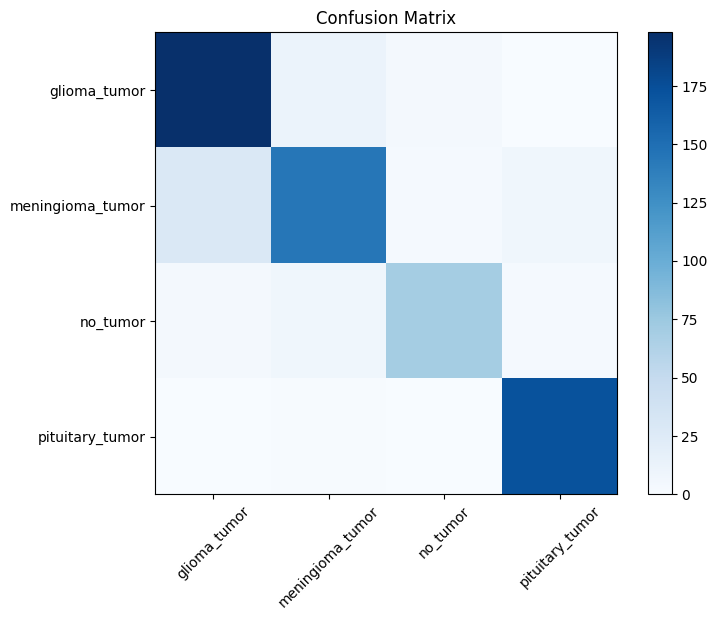

In [49]:

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

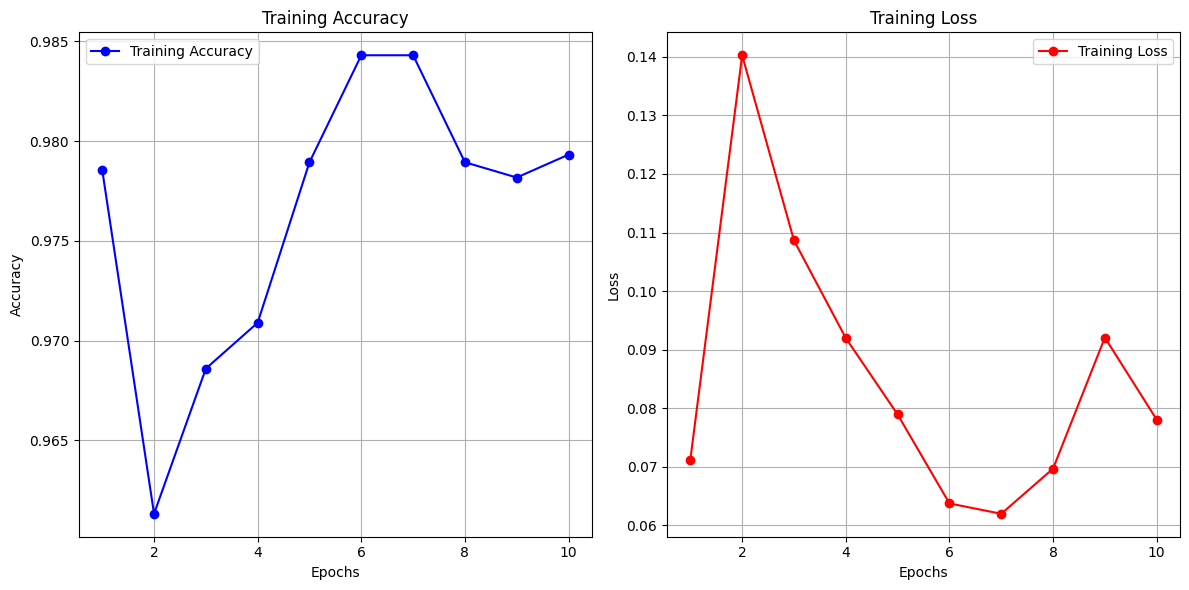

In [50]:
import matplotlib.pyplot as plt

# Extract history data
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'o-', label='Training Accuracy', color='b')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'o-', label='Training Loss', color='r')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


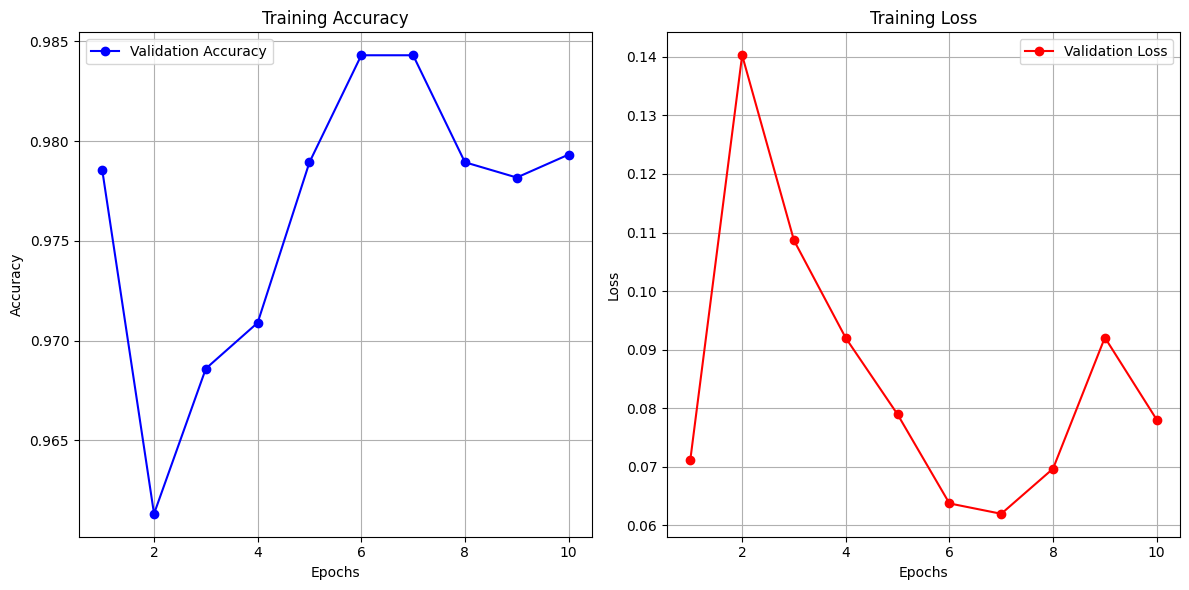

In [51]:
import matplotlib.pyplot as plt

# Extract history data
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'o-', label='Validation Accuracy', color='b')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'o-', label='Validation Loss', color='r')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
model.save('brain_tumor_classifier.keras')